In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_isopul_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Isopulegol
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49996,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49997,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49998,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..Isopulegol'], axis = 1)
y = df_mlp[['X..Isopulegol']]

<AxesSubplot:ylabel='Count'>

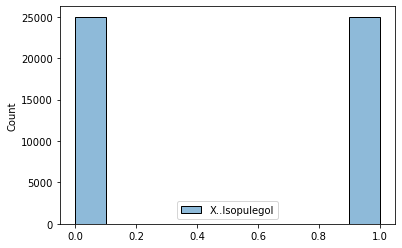

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.14967683035834098

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.8232945324105705

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.7604362116683282

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([8.83126513e-02, 8.41618189e-02, 9.87934288e-02, 8.38077672e-02,
       8.25987699e-02, 2.96779647e-01, 0.00000000e+00, 0.00000000e+00,
       2.09893762e-05, 2.06144683e-03, 9.80290447e-03, 0.00000000e+00,
       4.75217607e-03, 5.04454205e-05, 4.06101310e-03, 4.56748116e-03,
       5.31584698e-03, 7.09823365e-03, 0.00000000e+00, 5.81022863e-03,
       0.00000000e+00, 0.00000000e+00, 4.80308531e-03, 8.32839070e-03,
       7.66679347e-03, 2.75592308e-03, 4.03977649e-03, 1.56970075e-05,
       0.00000000e+00, 2.39902049e-03, 1.17453083e-02, 0.00000000e+00,
       5.08561480e-03, 0.00000000e+00, 0.00000000e+00, 6.71174547e-03,
       3.98043328e-03, 4.52693474e-03, 1.13545906e-04, 1.66428894e-04,
       3.76114951e-04, 5.76931893e-03, 7.54884872e-05, 4.08084018e-03,
       3.31281310e-04, 1.27364058e-02, 1.10509213e-03, 2.71475208e-04,
       7.76126316e-03, 4.30315968e-04, 1.96726849e-02, 5.82564214e-03,
       1.25302143e-02, 1.27009023e-03, 6.98902146e-03, 1.36432513e-03,
      

In [16]:
selector.threshold_

0.01162790697674419

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,relaxed,cheese,diesel,flowery,lemon,orange
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,1,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,1,0,0,0,0
2,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,1,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0,0,0
4,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.360708,-0.269375,0.169135,0.099257,0.141142,0,0,0,0,0,0,0
49996,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,0,0,0,0,0,0
49997,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,0,0,0
49998,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'relaxed',
 'cheese',
 'diesel',
 'flowery',
 'lemon',
 'orange']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_isopul.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_isopul.pkl")

['selected_X_mlp_lsa_elbow_isopul.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_isopul.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.2681737479077702

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.5268376130274264

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.5076464632385909

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'tanh'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_isopul.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_isopul.pkl")

['rscv_mlp_lsa_elbow_best_params_isopul.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'tanh', hidden_layer_sizes= (50,50,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.1071778944911262

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.9092315537875264

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.8409484319924984

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_isopul.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_isopul.pkl")

['y_test_mlpreg_lsa_elbow_isopul.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.10846424841177871

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.040041009561429294

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.20010249763915816

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.8398036597642378

Error analysis

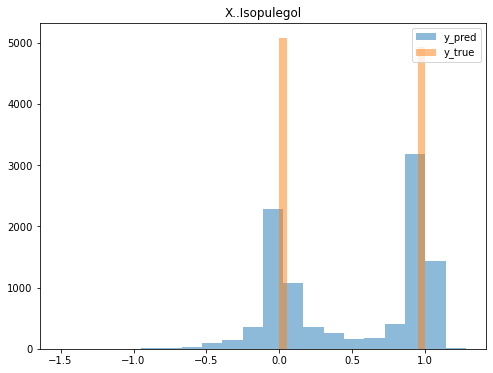

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Isopulegol"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_isopul.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.918
P-value: 0.000


<AxesSubplot:>

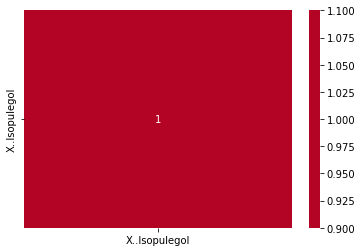

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)